In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns

In [76]:
df = pd.read_csv("D:\Data Analyst Projects\Project\Power BI\Customer Churn Analysis\Prediction_Data.csv")

In [77]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [78]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [79]:
#  Data Prediction 

df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'],axis = 1)

In [80]:
df

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed
3,Male,35,No,Maharashtra,10,12,NaN,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,Female,52,Yes,Punjab,1,11,NaN,Yes,Yes,Yes,...,Two Year,No,Credit Card,74.000000,4868.399902,0.00,0,2881.669922,7750.069824,Stayed
6003,Male,70,No,Kerala,1,32,NaN,Yes,Yes,No,...,One Year,No,Bank Withdrawal,25.000000,1260.699951,0.00,0,158.610001,1419.310059,Stayed
6004,Male,31,Yes,Gujarat,10,32,Deal 2,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,99.000000,5038.149902,0.00,0,2158.830078,7196.979980,Stayed
6005,Male,22,No,Odisha,8,7,Deal 4,Yes,Yes,Yes,...,Month-to-Month,Yes,Bank Withdrawal,100.650002,2415.949951,5.01,0,625.239990,3036.179932,Stayed


In [81]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [82]:
columns_to_encode = ['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type',
                     'Online_Security', 'Online_Backup','Device_Protection_Plan','Premium_Support', 'Streaming_TV',
                     'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract','Paperless_Billing', 'Payment_Method']

In [83]:
#  Encode categorical variable expect target Variable

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])



In [84]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,0,43,1,21,3,28,0,1,1,1,...,2,1,0,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed
3,1,35,0,12,10,12,5,1,0,1,...,2,1,1,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,1,75,1,17,12,27,1,1,0,1,...,2,1,1,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed


In [85]:
df['Customer_Status'] = df['Customer_Status'].map({"Stayed":0,'Churned':1})

In [86]:
df

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.099998,6683.399902,0.00,0,631.719971,7315.120117,0
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.150002,169.050003,0.00,10,122.370003,301.420013,1
2,0,43,1,21,3,28,0,1,1,1,...,2,1,0,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,0
3,1,35,0,12,10,12,5,1,0,1,...,2,1,1,84.400002,5969.299805,0.00,0,219.389999,6188.689941,0
4,1,75,1,17,12,27,1,1,0,1,...,2,1,1,72.599998,4084.350098,0.00,140,332.079987,4556.430176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,52,1,15,1,11,5,1,1,1,...,2,0,1,74.000000,4868.399902,0.00,0,2881.669922,7750.069824,0
6003,1,70,0,10,1,32,5,1,1,0,...,1,0,0,25.000000,1260.699951,0.00,0,158.610001,1419.310059,0
6004,1,31,1,5,10,32,1,1,0,1,...,0,1,0,99.000000,5038.149902,0.00,0,2158.830078,7196.979980,0
6005,1,22,0,13,8,7,3,1,1,1,...,0,1,0,100.650002,2415.949951,5.01,0,625.239990,3036.179932,0


In [87]:
# Split Data into Features and Target
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [88]:
x = df.drop('Customer_Status',axis=1)

In [89]:
y = df['Customer_Status']


In [90]:
#  split Data into training and testing sets

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=42)


In [102]:
# Train Random Forest Model  

rf_Model  = RandomForestClassifier(n_estimators=100, random_state = 42)

# Train the Model 

rf_Model.fit(x_train,y_train )

RandomForestClassifier(random_state=42)

In [92]:
# Evaluate Model 

y_pred = rf_Model.predict(x_test)

#  Evaluate the Model 

print("confusion_matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

confusion_matrix:
[[786  44]
 [145 227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       830
           1       0.84      0.61      0.71       372

    accuracy                           0.84      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.84      0.84      0.83      1202



In [93]:
#  Feature Selection using feature Importance 

importances = rf_Model.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
print(indices)

[0.00958641 0.06724557 0.00905657 0.04045578 0.03838019 0.04669635
 0.02130936 0.00339262 0.00948189 0.01335786 0.03210964 0.01739766
 0.00949846 0.00951274 0.01521852 0.00899874 0.00714969 0.00891483
 0.00724053 0.13755708 0.01350823 0.01690746 0.08583072 0.12924264
 0.0070913  0.01103239 0.08235184 0.14147493]
[27 19 23 22 26  1  5  3  4 10  6 11 21 14 20  9 25  0 13 12  8  2 15 17
 18 16 24  7]


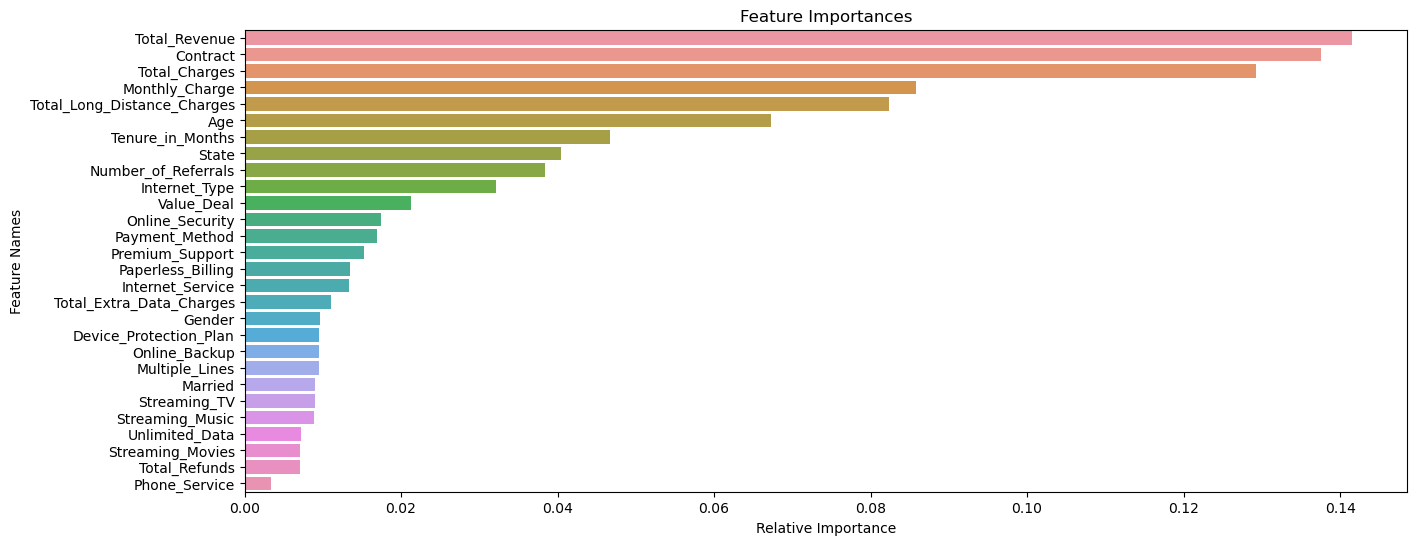

In [94]:
# plot the Feature Importances 
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=x.columns[indices])
plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()


In [95]:
new_data=pd.read_csv("D:\Data Analyst Projects\Project\Power BI\Customer Churn Analysis\JoinData.csv")
new_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,13666-UTT,Male,57,Yes,Uttarakhand,15,16,NaN,Yes,No,...,Bank Withdrawal,95.400002,293.149994,0.0,0,51.029999,344.179993,Joined,Others,Others
1,13744-AND,Female,41,Yes,Andhra Pradesh,8,3,Deal 5,Yes,No,...,Bank Withdrawal,19.650000,19.650000,0.0,0,13.850000,33.500000,Joined,Others,Others
2,13823-TEL,Female,31,Yes,Telangana,1,28,Deal 5,No,No,...,Bank Withdrawal,24.500000,46.400002,0.0,0,0.000000,46.400002,Joined,Others,Others
3,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.650000,19.650000,0.0,0,23.670000,43.320000,Joined,Others,Others
4,19041-AND,Female,36,No,Andhra Pradesh,6,21,Deal 5,No,No,...,Credit Card,35.099998,101.099998,0.0,0,0.000000,101.099998,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,87077-TAM,Male,62,Yes,Tamil Nadu,3,21,Deal 5,Yes,No,...,Credit Card,69.000000,147.800003,0.0,0,54.820000,202.619995,Joined,Others,Others
407,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.099998,72.099998,0.0,0,7.770000,79.870003,Joined,Others,Others
408,93521-MAH,Female,55,No,Maharashtra,6,35,NaN,Yes,No,...,Bank Withdrawal,-1.000000,49.299999,0.0,10,14.970000,74.269997,Joined,Others,Others
409,97615-MAH,Female,23,Yes,Maharashtra,11,10,Deal 5,Yes,No,...,Credit Card,20.200001,20.200001,0.0,0,41.099998,61.299999,Joined,Others,Others


In [96]:
#  retaing the original dataframe to preserve encoded columns 
original_data = new_data.copy()

In [97]:
#Retain the Customer_id Column 
customer_ids = new_data['Customer_ID']

In [98]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [99]:
new_data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

In [100]:
#  Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])


In [103]:
# Make predictions

new_predictions = rf_Model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"D:\Data Analyst Projects\Project\Power BI\Customer Churn Analysis.csv", index=False)